### Notebook Imports and Packages

In [37]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

### Example 1

### $f(x) = x^2 + x + 1$

In [38]:
def f(x):
    return x**2 + x + 1

In [39]:
# Make Data
x_1 = np.linspace(start=-3, stop=3, num=500)

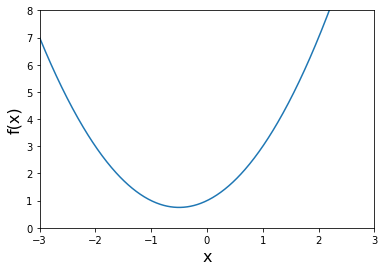

In [40]:
# Plot
plt.xlim(-3,3)
plt.ylim(0,8)

plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1))
plt.show()

### Slope & Derivatives
#### the derivative of $x^2 + x + 1$ is $2x + 1$ 

In [41]:
def df(x):
    return 2*x + 1

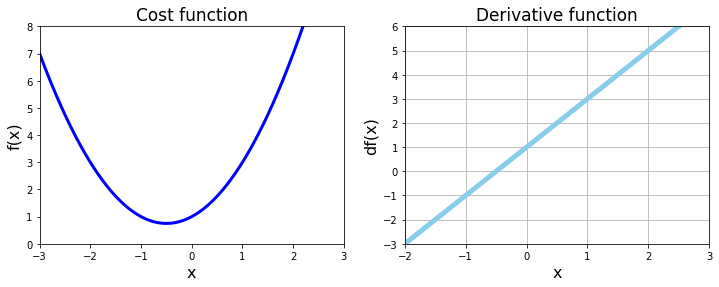

In [42]:
# Plot function and derivative side by side
plt.figure(figsize=[12, 4])

# Chart 1: plot function --->
plt.subplot(1, 2, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3)
#<---

# Char 2: derivative function --->
plt.subplot(1, 2, 2)

plt.title('Derivative function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5)
#<---

plt.show()

### Python Loops & Gradient Descent

In [43]:
# Python for loop
for i in range(3):
    print('Hello World', i)
print('End of loop')

Hello World 0
Hello World 1
Hello World 2
End of loop


In [44]:
# Python while loop
counter = 0
while counter < 3:
    print('Counting...', counter)
    counter += 1
print('Ready or not, here I come!')

Counting... 0
Counting... 1
Counting... 2
Ready or not, here I come!


In [45]:
# Gradient Descent
new_x = 3
step_multiplier = 0.1 #learning rate
precision = 1e-4

x_list = [new_x]
slope_list = [df(new_x)]

for i in range(30):
    previous_x = new_x
    gradient = df(previous_x)
    new_x = previous_x - step_multiplier * gradient
    
    x_list.append(new_x)
    slope_list.append(df(new_x))
    
    step_size = abs(new_x - previous_x)
    if step_size < precision:
        print('Loop ran this many times:', i)
        break
    
print('.Local minimum occurs at:', new_x)
print('.Slope or df(x) value at this point is:', df(new_x))
print('.Cost or f(x) value at this point is:', f(new_x))


.Local minimum occurs at: -0.4956672098625011
.Slope or df(x) value at this point is: 0.008665580274997753
.Cost or f(x) value at this point is: 0.7500187730703756


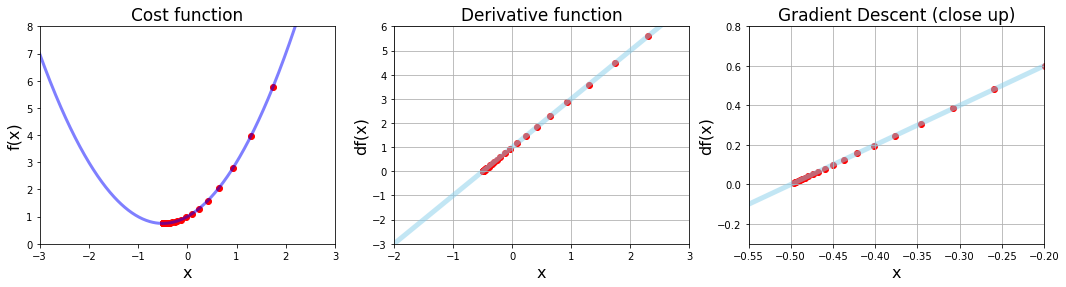

In [46]:
# Superimpose the gradient descent calculations
plt.figure(figsize=[18, 4])

# Chart 1: plot function --->
plt.subplot(1, 3, 1)

plt.xlim(-3,3)
plt.ylim(0,8)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('f(x)', fontsize=16)

plt.plot(x_1, f(x_1), color='blue', linewidth=3, alpha=0.5)

values = np.array(x_list)
plt.scatter(x_list, f(values), color='red')

#<---

# Chart 2: derivative function --->
plt.subplot(1, 3, 2)

plt.title('Derivative function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()

plt.xlim(-2,3)
plt.ylim(-3,6)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.5)

plt.scatter(x_list, slope_list, color='red')
#<---

# Chart 3: derivative function (close up) --->
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('df(x)', fontsize=16)

plt.grid()

plt.xlim(-0.55, -0.2)
plt.ylim(-0.3, 0.8)

plt.plot(x_1, df(x_1), color='skyblue', linewidth=5, alpha=0.5)

plt.scatter(x_list, slope_list, color='red')
#<---

plt.show()

### Example 2 - Multiple Minima vs Initial Guess & Advanced Functions

### $g(x) = x^4 - 4x^2 + 5$ and the derivative is $dg(x) = 4x^3 - 8x$

In [47]:
def g(x):
    return x**4 - 4*x**2 + 5

def dg(x):
    return 4*x**3 - 8*x

In [48]:
# Make Data
x_2 = np.linspace(start=-2, stop=2, num=1000)

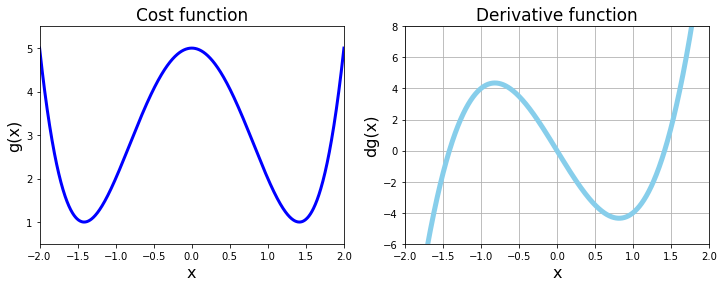

In [49]:
# Plot function and derivative side by side
plt.figure(figsize=[12, 4])

# Chart 1: plot function --->
plt.subplot(1, 2, 1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3)
#<---

# Char 2: derivative function --->
plt.subplot(1, 2, 2)

plt.title('Derivative function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5)
#<---

plt.show()

### Gradient Descent as a Python Function

In [50]:
# Gradient Descent
def gradient_descent(derivative_func, initial_guess, multiplier=0.02, precision=1e-3, max_iter=300):
    new_x = initial_guess
    x_list = [initial_guess]
    slope_list = [derivative_func(new_x)]

    for i in range(max_iter):
        previous_x = new_x
        gradient = derivative_func(previous_x) #current value of the slope of the cost function
        new_x = previous_x - multiplier * gradient

        x_list.append(new_x)
        slope_list.append(derivative_func(new_x))

        step_size = abs(new_x - previous_x)
        if step_size < precision:
            print('Loop ran this many times:', i)
            break
    
    return new_x, x_list, slope_list

Loop ran this many times: 32
.Local minimum occurs at: 1.4120887490901561
.Slope or df(x) value at this point is: -0.03392043166866365
.Cost or f(x) value at this point is: 1.000036064405096


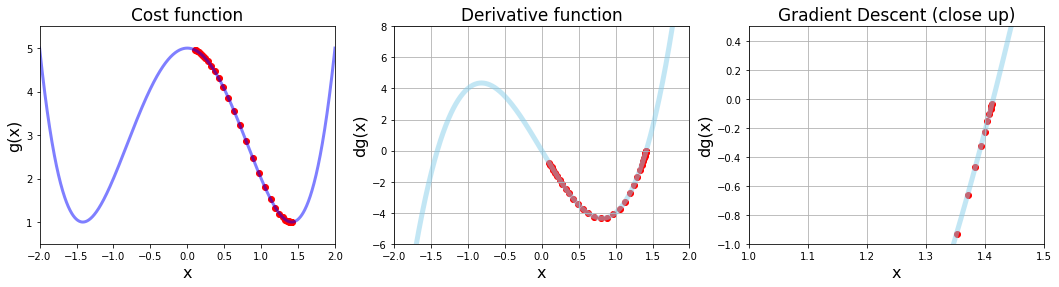

In [51]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dg, initial_guess = 0.1)

print('.Local minimum occurs at:', local_min)
print('.Slope or df(x) value at this point is:', dg(local_min))
print('.Cost or f(x) value at this point is:', g(local_min))

# Superimpose the gradient descent calculations
plt.figure(figsize=[18, 4])

# Chart 1: plot function --->
plt.subplot(1, 3, 1)

plt.xlim(-2,2)
plt.ylim(0.5,5.5)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('g(x)', fontsize=16)

plt.plot(x_2, g(x_2), color='blue', linewidth=3, alpha=0.5)

values = np.array(list_x)
plt.scatter(list_x, g(values), color='red')

#<---

# Chart 2: derivative function --->
plt.subplot(1, 3, 2)

plt.title('Derivative function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.xlim(-2,2)
plt.ylim(-6,8)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.5)

plt.scatter(list_x, deriv_list, color='red')
#<---

# Chart 3: derivative function (close up) --->
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dg(x)', fontsize=16)

plt.grid()

plt.xlim(1,1.5)
plt.ylim(-1,0.5)

plt.plot(x_2, dg(x_2), color='skyblue', linewidth=5, alpha=0.5)

plt.scatter(list_x, deriv_list, color='red')
#<---

plt.show()

### Example 3 - Divergence, Overflow and Python Tuples

### $h(x) = x^5 - 2x^4 + 2$ and the derivative is $dh(x) = 5x^4 - 8x^3$

In [52]:
def h(x):
    return x**5 - 2*x**4 + 2

def dh(x):
    return 5*x**4 - 8*x**3

In [53]:
# Make Data
x_3 = np.linspace(start=-2.5, stop=2.5, num=1000)

Loop ran this many times: 115
.Local minimum occurs at: 1.5989534547394717
.Slope or dh(x) value at this point is: -0.021391216571167604
.Cost or h(x) value at this point is: -0.6214287992331258


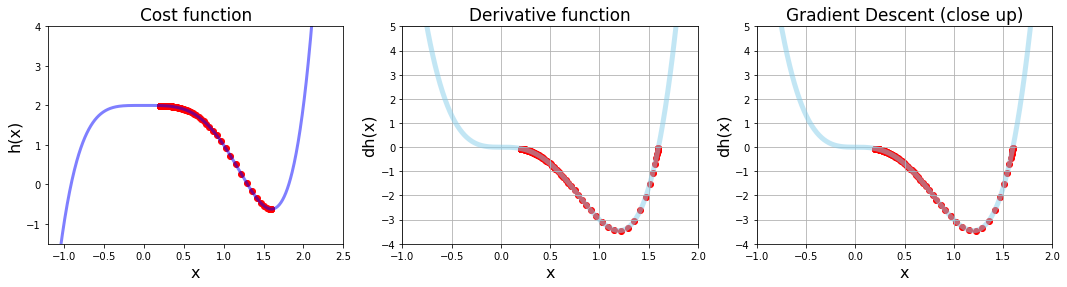

In [75]:
local_min, list_x, deriv_list = gradient_descent(derivative_func = dh, initial_guess = 0.2, max_iter=500)

print('.Local minimum occurs at:', local_min)
print('.Slope or dh(x) value at this point is:', dh(local_min))
print('.Cost or h(x) value at this point is:', h(local_min))

# Superimpose the gradient descent calculations
plt.figure(figsize=[18, 4])

# Chart 1: plot function --->
plt.subplot(1, 3, 1)

plt.xlim(-1.2,2.5)
plt.ylim(-1.5,4)

plt.title('Cost function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('h(x)', fontsize=16)

plt.plot(x_3, h(x_3), color='blue', linewidth=3, alpha=0.5)

values = np.array(list_x)
plt.scatter(list_x, h(values), color='red')

#<---

# Chart 2: derivative function --->
plt.subplot(1, 3, 2)

plt.title('Derivative function', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.5)

plt.scatter(list_x, deriv_list, color='red')
#<---

# Chart 3: derivative function (close up) --->
plt.subplot(1, 3, 3)

plt.title('Gradient Descent (close up)', fontsize=17)
plt.xlabel('x', fontsize=16)
plt.ylabel('dh(x)', fontsize=16)

plt.grid()

plt.xlim(-1,2)
plt.ylim(-4,5)

plt.plot(x_3, dh(x_3), color='skyblue', linewidth=5, alpha=0.5)

plt.scatter(list_x, deriv_list, color='red')
#<---

plt.show()

### Python Tuples

In [55]:
# Creating a tuple
breakfast = 'bacon', 'eggs', 'avocado'
unlucky_numbers = 13, 4, 9, 26, 17

# how to access a value in a tuple
print('I looooove', breakfast[0])
print('My hotel has no '+ str(unlucky_numbers[0]) + 'th floor')

not_my_address = 1, 'Infinite Loop', 'Cupertino', 95014

tuple_with_single_value = 42,
print(tuple_with_single_value)
print(type(tuple_with_single_value))

# sequence unpacking
main, side, greens = breakfast
print('Main course is', main)

data_tuple = gradient_descent(derivative_func=dh, initial_guess=0.2)
print('Local min is', data_tuple[0])
print('Cost at the last x value is', h(data_tuple[0]))
print('Number of steps', len(data_tuple[1]))

I looooove bacon
My hotel has no 13th floor
(42,)
<class 'tuple'>
Main course is bacon
Loop ran this many times: 115
Local min is 1.5989534547394717
Cost at the last x value is -0.6214287992331258
Number of steps 117


### The Learning Rate

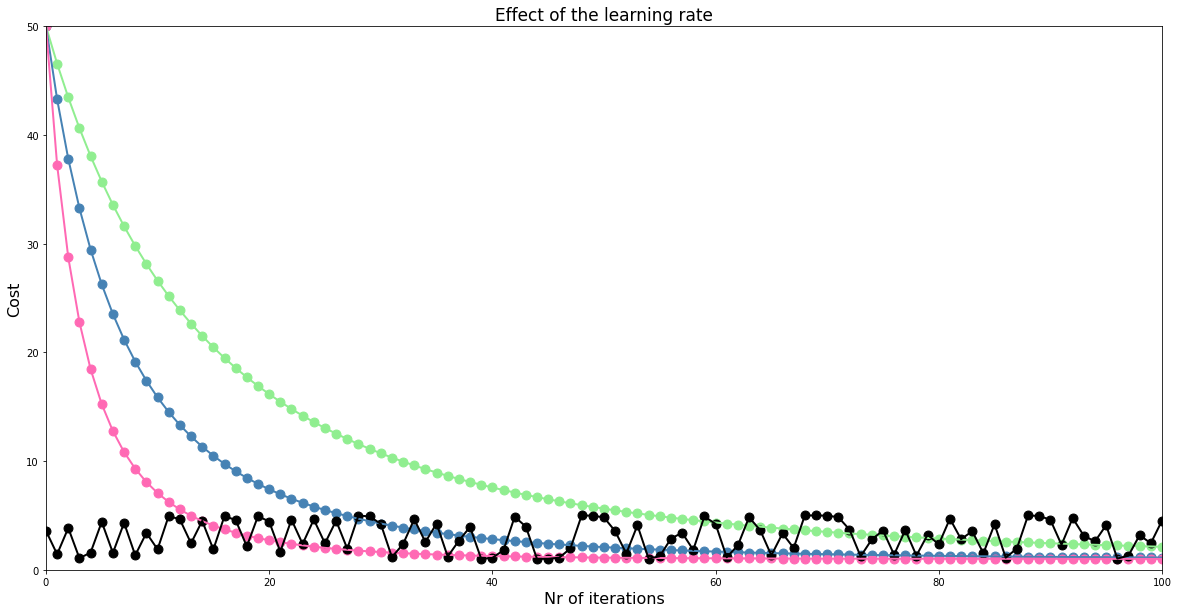

In [76]:
n = 100
low_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.0005, precision=0.0001,max_iter=n)

mid_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.001, precision=0.0001,max_iter=n)

high_gamma = gradient_descent(derivative_func = dg, initial_guess = 3, multiplier=0.002, precision=0.0001,max_iter=n)

# example of a non-converging learning rate
ultrahigh_gamma = gradient_descent(derivative_func = dg, initial_guess = 1.9, multiplier=0.25, precision=0.0001,max_iter=n)

plt.figure(figsize=[20, 10])

plt.xlim(0,n)
plt.ylim(0,50)

plt.title('Effect of the learning rate', fontsize=17)
plt.xlabel('Nr of iterations', fontsize=16)
plt.ylabel('Cost', fontsize=16)

# Values for our charts
# 1) Y Axis Data: convert the lists to numpy arrays
low_values = np.array(low_gamma[1])
mid_values = np.array(mid_gamma[1])
high_values = np.array(high_gamma[1])
ultrahigh_values = np.array(ultrahigh_gamma[1])

# 2) X Axis Data: create a list from 0 to n+1
iteration_list = list(range(0, n+1))

# Plotting low learning rate
plt.plot(iteration_list, g(low_values), color='lightgreen', linewidth=2)
plt.scatter(iteration_list, g(low_values), color='lightgreen', s=80)

# Plotting mid learning rate
plt.plot(iteration_list, g(mid_values), color='steelblue', linewidth=2)
plt.scatter(iteration_list, g(mid_values), color='steelblue', s=80)

# Plotting high learning rate
plt.plot(iteration_list, g(high_values), color='hotpink', linewidth=2)
plt.scatter(iteration_list, g(high_values), color='hotpink', s=80)

# Plotting ultrahigh learning rate
plt.plot(iteration_list, g(ultrahigh_values), color='black', linewidth=2)
plt.scatter(iteration_list, g(ultrahigh_values), color='black', s=80)

plt.show()